# ASHWIN SURESH (21MIS1174)

# First will load the file to the variable filepath

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# loading file
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/SUV.csv'

# Reading the csv file with the help of 'pandas' library

In [2]:
data=pd.read_csv(filepath)

# Deleting 'User ID' as its not a required column for consideration
# Replacing 'Gender' column with 0 & 1

In [3]:
data = data.drop(columns='User ID', axis=1)

In [4]:
# Encoding 'Gender' column
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

# First 5 data is displayed.. Pre-processing is not much needed as for prediction and classification User ID will be discarded.. Remaining values are anyways in numerical form

In [5]:
data.head() # First 5 rows of the dataset

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


# Will analyze what is the size of the dataset

In [6]:
data.shape

(400, 4)

# We need to first check the dataset if any null or empty data is there

In [7]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

# We need to classify Features (Gender, Age, Salary) and Target (Purchase)

In [9]:
# Now User ID is unique so we don't need it for classification
# Extracting Independent and Dependent Variable  
x = data.iloc[:, 0:3].values  
y = data.iloc[:, -1].values 

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set

In [10]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)  

# Feature Scaling is required for reducing the gap/distance between features such as GENDER which is 0 (Male) or 1 (Female), AGE which is likely between 20-60 whereas SALARY between 20000 to 140000 and normalize the features subsequently

In [11]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

# Using Decision Tree module in sklearn.tree we build ID3 model which takes criterion as 'entropy'

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Build a ID3 Classifier
# Model training
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# The prediction model produces a set of predicted values in an array

In [14]:
# Based on the trained model predicting the target column
y_pred = clf.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# To classify the result we use confusion matrix and classification report

In [15]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[56,  2],
       [ 2, 20]], dtype=int64)

# The classification report contains Precision, Recall, F1-Score, Accuracy, etc.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {accuracy*100} %")
print("F1 Score:", f1)

Accuracy: 95.0 %
F1 Score: 0.95


# Importing MATLAB plotting libraries for graphical representation

In [18]:
import matplotlib.pyplot as plt    # from matplotlib import pyplot as plt
%matplotlib inline

# It is better to visualize the confusion matrix as heatmap for better clarity

<Axes: >

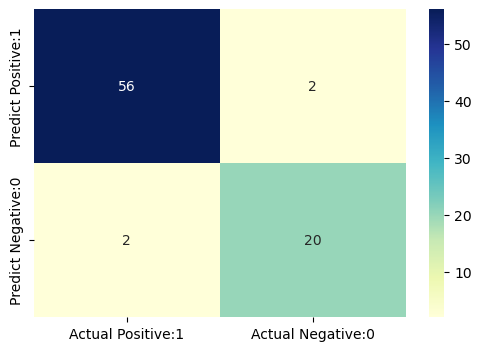

In [19]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Plotting the decision tree for better visualization with Purchase result as either 'Yes' or 'No' from module 'tree'

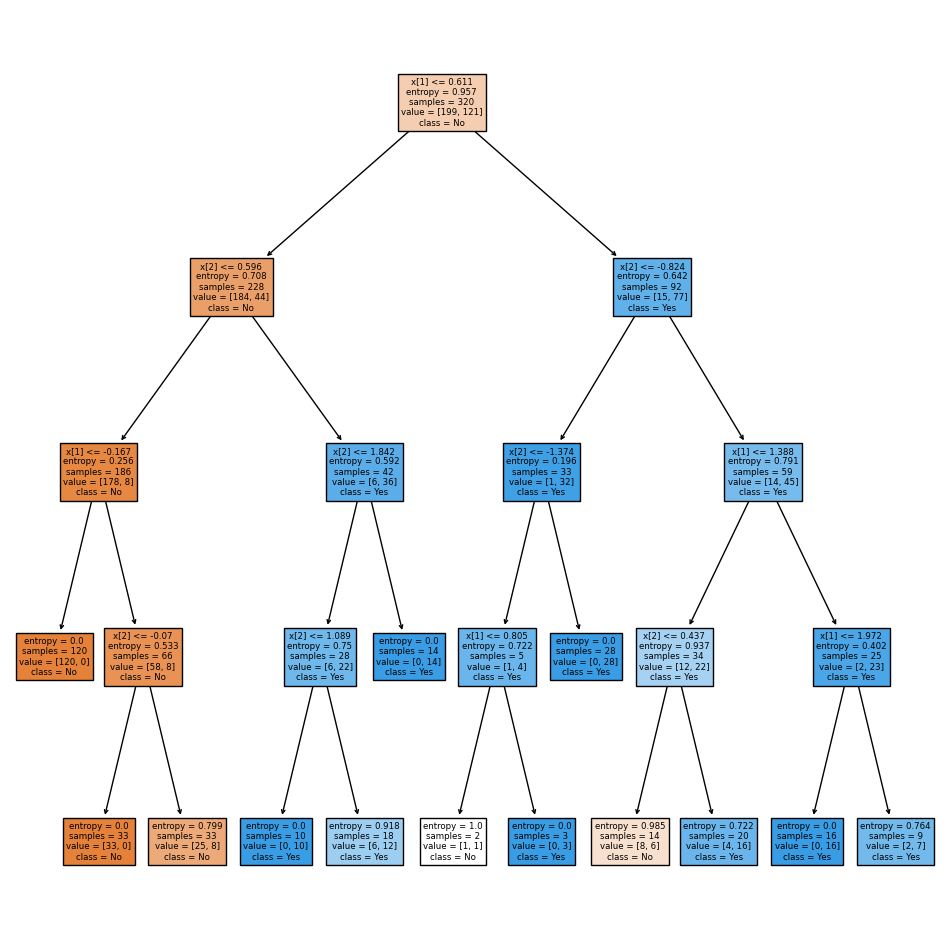

In [20]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True, ax=ax, class_names=['No','Yes'])
plt.show()

# Now we visualize the two clusters with respect to two main features (AGE & SALARY) and plot them for better understanding

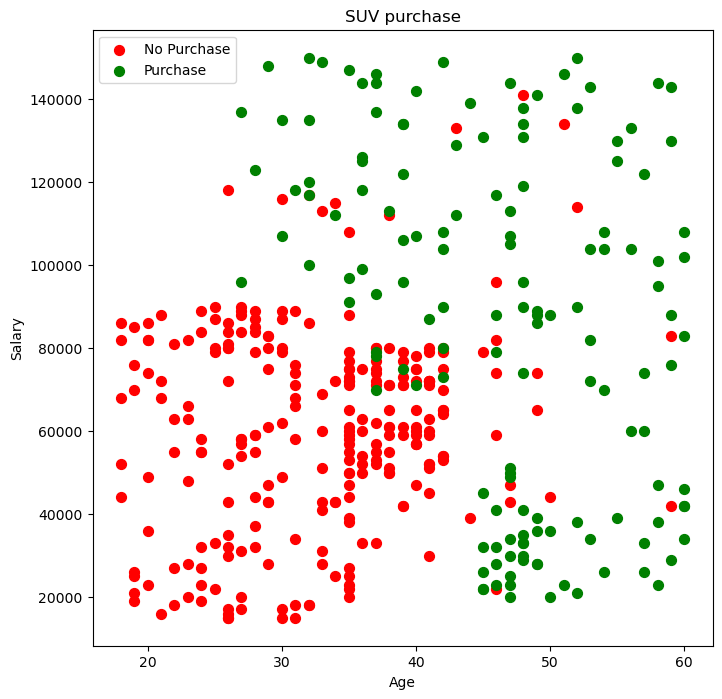

In [21]:
# plotting all the clusters
plt.figure(figsize=(8, 8))
plt.scatter(x[y==0,1], x[y==0,2], s=50, color='red', label='No Purchase')
plt.scatter(x[y==1,1], x[y==1,2], s=50, color='green', label='Purchase')

plt.title('SUV purchase')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [22]:
print( 'Training set score: {: .4f}'.format(clf.score(x_train, y_train)))
print( 'Test set score: {: .4f}'.format(clf.score(x_test, y_test)))

Training set score:  0.9156
Test set score:  0.9500


# Final interpretation